In [44]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
data = pd.read_csv('./data/xqc_chat.csv', parse_dates=True)

data.columns = [col.lower() for col in data.columns]

data.dropna(inplace=True) # cant use if missing data
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)

data.tail(2)

,message_datetime,name,moderator,vip,subscriber,is_first_message,message_len,qtd_msgs_15_secs,message,banned
702985,2021-09-08 20:18:00,mc_cree2,0,0,0,0,6,1.0,PogU 1,0
702986,2021-09-08 20:18:00,REEEEEEEEEEEEEEEEEEEEEESE,0,0,1,0,10,2.0,nice shots,0


In [26]:
# split on days into fifths for faser training 
data1 = data.iloc[: (len(data) // 10)]


In [ ]:
def get_scores(y_true, y_preds):
    return f'f1: {f1_score(y_true, y_preds)}, precision: {precision_score(y_true, y_preds)}, accuracy: {accuracy_score(y_true, y_preds)}'

## Baseline 

In [5]:
# baseline
data1['banned'].value_counts()

0    69759
1      539
Name: banned, dtype: int64

In [11]:
data2['banned'].value_counts()

data3['banned'].value_counts()

data4['banned'].value_counts()

data5['banned'].value_counts()

In [97]:
X = data1.drop(columns=['name', 'banned', 'is_first_message'])
y = data1['banned']

dc = DummyClassifier(strategy='constant', constant=1)
dc.fit(X, y)
dummy_preds = dc.predict(X)


get_scores(y, dummy_preds)

'f1: 0.015218035772265905, precision: 0.007667358957580585, accuracy: 0.007667358957580585'

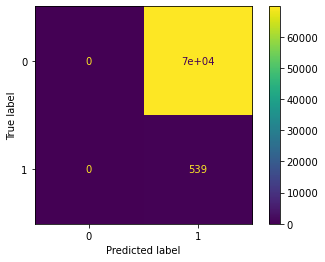

In [98]:
ConfusionMatrixDisplay.from_predictions(y, dummy_preds)

In [99]:
X = data1.drop(columns=['name', 'banned', 'is_first_message'])
y = data1['banned']

dc = DummyClassifier()
dc.fit(X, y)
dummy_preds = dc.predict(X)


get_scores(y, dummy_preds)

C:\Users\David\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'f1: 0.0, precision: 0.0, accuracy: 0.9923326410424194'

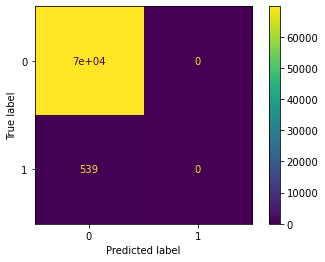

In [100]:
ConfusionMatrixDisplay.from_predictions(y, dummy_preds)

## Logistic Regression

In [ ]:
X = data1.drop(columns=['name', 'banned','message_datetime', 'message'])
y = data1['banned']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

get_scores(y_test, lr_preds)

In [89]:
f'f1: {f1_score(y_test, lr_preds)}, precision: {precision_score(y_test, lr_preds)}, accuracy: {accuracy_score(y_test, lr_preds)}'

'f1: 0.13157894736842105, precision: 0.5882352941176471, accuracy: 0.9924893314366998'

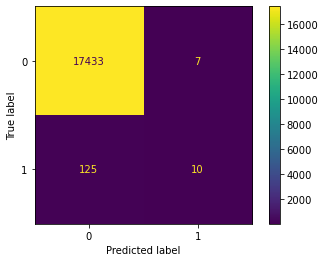

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds)

In [ ]:
X = data1.drop(columns=['name', 'banned', 'is_first_message', 'message_datetime', 'moderator', 'vip', 'subscriber'])
y = data1['banned']

cv = CountVectorizer(stop_words='english', min_df=5)
cv_message = cv.fit_transform(X['message'])

X_cv = pd.merge(left=X, right=pd.DataFrame.sparse.from_spmatrix(cv_message, columns=cv.get_feature_names_out()), left_index=True, right_index=True)
X_cv.drop(columns='message_x', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, random_state=42, stratify=y)

lr2 = LogisticRegression(max_iter=10_000)
lr2.fit(X_train, y_train)
lr2_preds = lr2.predict(X_test)

get_scores(y_test, lr2_preds)

In [90]:
f'f1: {f1_score(y_test, lr2_preds)}, precision: {precision_score(y_test, lr2_preds)}, accuracy: {accuracy_score(y_test, lr2_preds)}'

'f1: 0.40740740740740744, precision: 0.5432098765432098, accuracy: 0.9927169274537696'

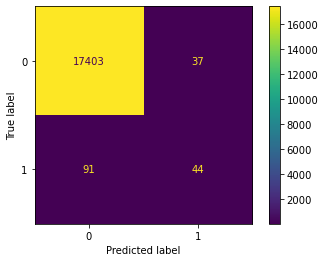

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, lr2_preds)

In [ ]:
X = data1.drop(columns=['name', 'banned', 'is_first_message', 'message_datetime', 'moderator', 'vip', 'subscriber'])
y = data1['banned']

cv = CountVectorizer(stop_words='english', min_df=5)
cv_message = cv.fit_transform(X['message'])

X_cv = pd.merge(left=X, right=pd.DataFrame.sparse.from_spmatrix(cv_message, columns=cv.get_feature_names_out()), left_index=True, right_index=True)
X_cv.drop(columns=['message_x', 'message_len'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, random_state=42, stratify=y)

lr3 = LogisticRegression(max_iter=10_000)
lr3.fit(X_train, y_train)
lr3_preds = lr3.predict(X_test)

get_scores(y_test, lr3_preds)

In [91]:
f'f1: {f1_score(y_test, lr3_preds)}, precision: {precision_score(y_test, lr3_preds)}, accuracy: {accuracy_score(y_test, lr3_preds)}'

'f1: 0.38095238095238093, precision: 0.5333333333333333, accuracy: 0.9926031294452347'

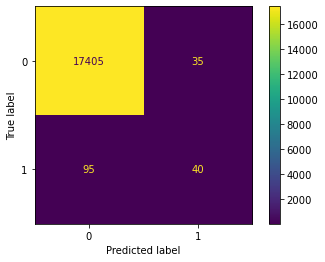

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, lr3_preds)

In [ ]:
X = data1.drop(columns=['banned', 'is_first_message', 'message_datetime', 'moderator', 'vip', 'subscriber'])
X = pd.get_dummies(X, columns=['name'])
X = X.drop(columns=['message'])
y = data1['banned']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

lr4 = LogisticRegression(max_iter=10_000)
lr4.fit(X_train, y_train)
lr4_preds = lr4.predict(X_test)

get_scores(y_test, lr4_preds)

In [92]:
f'f1: {f1_score(y_test, lr4_preds)}, precision: {precision_score(y_test, lr4_preds)}, accuracy: {accuracy_score(y_test, lr4_preds)}'

'f1: 0.10810810810810811, precision: 0.6153846153846154, accuracy: 0.9924893314366998'

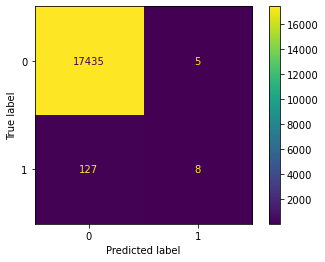

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, lr4_preds)

In [87]:
X = data1.drop(columns=['name', 'banned', 'is_first_message', 'message_datetime', 'moderator', 'vip', 'subscriber'])
y = data1['banned']

cv = CountVectorizer(stop_words='english', min_df=5, max_df=1000)
cv_message = cv.fit_transform(X['message'])

X_cv = pd.merge(left=X, right=pd.DataFrame.sparse.from_spmatrix(cv_message, columns=cv.get_feature_names_out()), left_index=True, right_index=True)
X_cv.drop(columns='message_x', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, random_state=42, stratify=y)

lr5 = LogisticRegression(max_iter=10_000)
lr5.fit(X_train, y_train)
lr5_preds = lr5.predict(X_test)

get_scores(y_test, lr5_preds)

C:\Users\David\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'f1: 0.0, precision: 0.0, accuracy: 0.9923326410424194'

In [93]:
f'f1: {f1_score(y_test, lr5_preds)}, precision: {precision_score(y_test, lr5_preds)}, accuracy: {accuracy_score(y_test, lr5_preds)}'

'f1: 0.3518518518518518, precision: 0.4691358024691358, accuracy: 0.9920341394025605'

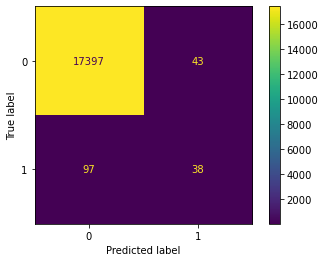

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, lr5_preds)

In [96]:
y_test.sum()

135

In [102]:
X_train.shape

(52723, 2170)

In [ ]:
data1[data1]